In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

df = pd.read_csv('train.csv')
df

,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
0,1/1,00:00,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,32.33,-1,9.95,271.3,806.779,0.0,0.219,0.0,0.0
1,1/1,00:01,-0.937921,0.000000,357.65505,7.251,1.040,-7.260,32.40,-1,8.20,272.9,806.840,0.0,0.206,0.0,0.0
2,1/1,00:02,-0.944395,0.000000,358.45438,7.256,1.093,-7.207,32.54,-1,6.70,288.8,806.876,0.0,0.148,0.0,0.0
3,1/1,00:03,-0.951350,-0.029673,359.25416,7.254,1.060,-7.440,31.89,-1,7.70,294.0,806.823,0.0,0.235,0.0,0.0
4,1/1,00:04,-0.934976,-0.054401,0.05415,7.331,1.081,-7.419,31.78,-1,7.20,285.5,806.762,0.0,0.182,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527035,12/31,23:55,-1.360910,-0.340704,352.62902,-0.469,-3.940,-10.140,43.61,-1,0.00,0.0,816.186,0.0,2.899,0.0,0.0
527036,12/31,23:56,-1.342520,-0.325891,353.41779,-0.499,-3.927,-10.127,43.77,-1,0.00,0.0,816.185,0.0,2.866,0.0,0.0
527037,12/31,23:57,-1.341260,-0.320952,354.20842,-0.522,-3.958,-10.158,43.73,-1,0.00,0.0,816.198,0.0,2.882,0.0,0.0
527038,12/31,23:58,-1.334130,-0.320953,355.00071,-0.558,-3.979,-10.079,44.17,-1,0.00,0.0,816.194,0.0,2.805,0.0,0.0


In [2]:
import tensorflow

In [3]:
!nvidia-smi

Mon Nov 15 06:57:23 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.91.03    Driver Version: 460.91.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000000:07:00.0 Off |                    0 |
| N/A   36C    P0    42W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Data Cleaning and Analysis 

In [4]:
# df.describe().transpose()

In [5]:
# df.info()

In [6]:
df['Snow Depth [cm]'].replace(-7999, np.NaN, inplace  = True)
df['Snow Depth [cm]'].fillna(method="ffill", inplace=True)

In [7]:
df['day'] = np.array([[day for i in range(1440)] for day in range(1, 367)]).flatten()

In [8]:
df.drop(['DATE (MM/DD)'], axis = 1, inplace = True)

In [9]:
df

,MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),day
0,00:00,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,32.33,-1,9.95,271.3,806.779,0.0,0.219,0.0,0.0,1
1,00:01,-0.937921,0.000000,357.65505,7.251,1.040,-7.260,32.40,-1,8.20,272.9,806.840,0.0,0.206,0.0,0.0,1
2,00:02,-0.944395,0.000000,358.45438,7.256,1.093,-7.207,32.54,-1,6.70,288.8,806.876,0.0,0.148,0.0,0.0,1
3,00:03,-0.951350,-0.029673,359.25416,7.254,1.060,-7.440,31.89,-1,7.70,294.0,806.823,0.0,0.235,0.0,0.0,1
4,00:04,-0.934976,-0.054401,0.05415,7.331,1.081,-7.419,31.78,-1,7.20,285.5,806.762,0.0,0.182,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527035,23:55,-1.360910,-0.340704,352.62902,-0.469,-3.940,-10.140,43.61,-1,0.00,0.0,816.186,0.0,2.899,0.0,0.0,366
527036,23:56,-1.342520,-0.325891,353.41779,-0.499,-3.927,-10.127,43.77,-1,0.00,0.0,816.185,0.0,2.866,0.0,0.0,366
527037,23:57,-1.341260,-0.320952,354.20842,-0.522,-3.958,-10.158,43.73,-1,0.00,0.0,816.198,0.0,2.882,0.0,0.0,366
527038,23:58,-1.334130,-0.320953,355.00071,-0.558,-3.979,-10.079,44.17,-1,0.00,0.0,816.194,0.0,2.805,0.0,0.0,366


In [10]:
grouped_df = df.groupby(['day'], sort = False, as_index = False)
grouped_df.first()

,day,MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
0,1,00:00,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,32.33,-1,9.95,271.30,806.779,0.000,0.219,0.0,0.0
1,2,00:00,-0.919309,-0.163202,356.49384,3.508,-1.919,-10.919,30.43,-1,11.45,265.80,800.372,0.000,0.318,0.0,0.0
2,3,00:00,-0.840469,0.089019,356.14060,0.137,-4.331,-13.731,30.03,-1,5.45,300.00,813.182,0.000,0.332,0.0,0.0
3,4,00:00,-0.969991,-0.182984,355.79734,5.818,-0.038,-8.538,31.98,-1,5.70,295.10,819.158,0.000,0.323,0.0,0.0
4,5,00:00,-0.861170,-0.361021,355.46466,7.607,0.486,-10.614,23.52,-1,11.20,269.10,818.427,0.000,0.285,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,362,00:00,-1.059090,-0.187632,358.47767,3.608,-0.659,-6.459,44.75,-1,6.20,290.80,810.515,0.000,0.416,0.0,0.0
362,363,00:00,-1.018440,0.079003,358.08685,-1.373,-3.586,-7.186,60.97,-1,4.20,26.31,817.811,0.000,0.393,0.0,0.0
363,364,00:00,-1.262280,-0.049377,357.70182,-3.414,-3.644,-4.044,94.80,-1,0.00,0.00,808.972,0.000,1.711,1.0,0.0
364,365,00:00,-1.212080,-0.192571,357.32339,-7.285,-8.745,-12.245,64.37,-1,2.20,242.60,816.616,5.842,4.087,0.0,0.0


In [11]:
indexes = np.array([])
for name,group in grouped_df:
  a = group['Total Cloud Cover [%]']
  indexes = np.append(indexes,list(range(group[a>0].index[0],group[a>0].index[-1] + 1)))

In [12]:
cleaned_df = df.loc[indexes.astype('int64')]

In [13]:
cleaned_df = cleaned_df.reset_index(drop=True)
cleaned_df.head()

,MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),day
0,07:47,14.4935,0.079127,123.84491,6.933,1.403,-5.597,38.24,6,0.7,210.3,802.042,0.0,0.032,0.0,0.1951,1
1,07:48,16.5178,-0.034618,124.01096,6.793,1.294,-5.606,38.58,8,0.7,232.2,801.948,0.0,0.029,0.0,0.1867,1
2,07:49,18.6171,-0.153309,124.17734,6.674,1.260,-5.540,39.12,10,1.7,263.9,801.940,0.0,0.173,0.0,0.1783,1
3,07:50,20.5986,-0.143419,124.34405,6.646,1.306,-5.494,39.35,13,2.2,277.5,801.927,0.0,0.144,0.0,0.1758,1
4,07:51,22.4362,-0.079128,124.51110,6.676,1.316,-5.384,39.64,15,2.2,233.4,801.829,0.0,0.355,0.0,0.1765,1


In [14]:
grouped_cleaned_df = cleaned_df.groupby('day', sort = False)
grouped_cleaned_df.get_group(52).head()

,MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),day
28518,07:08,47.2362,407.971,106.73245,-0.830,-5.710,-18.510,20.79,2,3.20,272.0,823.115,0.0,11.69,0.0,0.8679,52
28519,07:09,50.0642,422.240,106.89540,-0.679,-5.570,-18.670,20.22,2,3.45,268.1,823.124,0.0,11.64,0.0,0.8633,52
28520,07:10,52.9976,436.138,107.05857,-0.567,-5.430,-18.230,20.89,2,3.70,266.5,823.147,0.0,11.58,0.0,0.8599,52
28521,07:11,55.9316,449.813,107.22195,-0.578,-5.485,-18.085,21.20,2,3.45,278.2,823.157,0.0,11.45,0.0,0.8554,52
28522,07:12,58.9738,463.930,107.38555,-0.690,-5.501,-17.801,21.98,2,3.20,277.2,823.140,0.0,11.48,0.0,0.8492,52


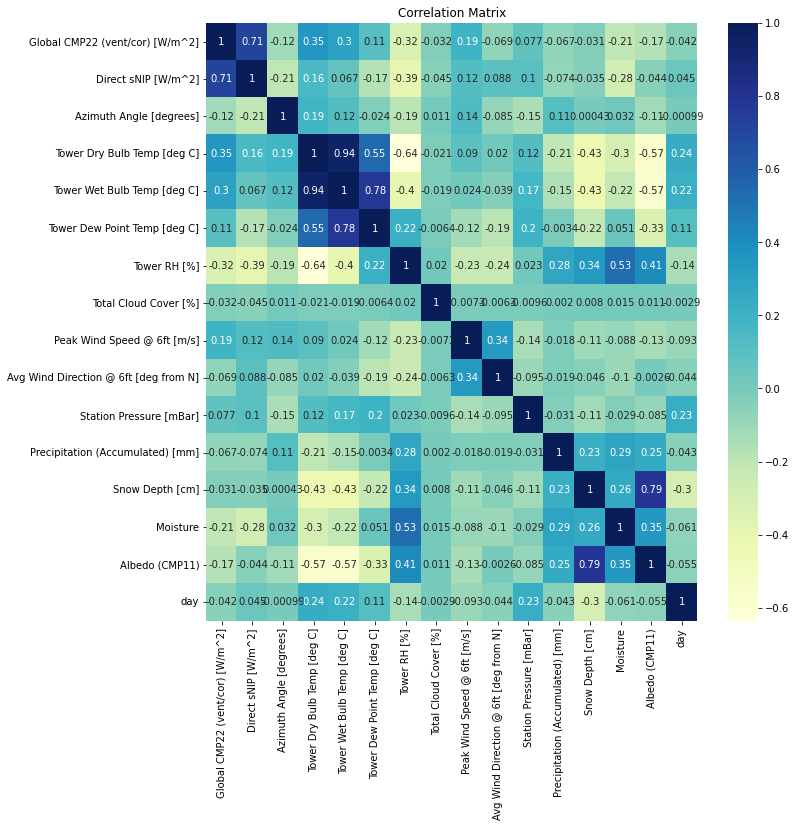

In [15]:
# Plotting correlation between every pair of columns
plt.rcParams['figure.figsize'] = [11, 11]
sns.heatmap(cleaned_df.corr(),annot = True,cmap = "YlGnBu")
plt.title('Correlation Matrix')
plt.show()

In [16]:
cleaned_df[cleaned_df['Total Cloud Cover [%]'] == -1].head()

,MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),day
29127,17:17,22.3465,42.02140,252.78436,10.290,1.419,-13.181,15.56,-1,1.95,104.9,819.792,0.0,9.040,0.0,0.3452,52
29128,17:18,20.3075,5.49932,252.94834,10.250,1.317,-13.583,15.04,-1,1.20,109.5,819.803,0.0,9.100,0.0,0.3066,52
29129,17:19,19.6916,4.25804,253.11210,10.220,1.353,-13.247,15.54,-1,1.70,104.5,819.822,0.0,8.990,0.0,0.3170,52
54548,06:14,15.6567,6.94346,88.04005,5.858,0.488,-6.812,37.08,-1,2.70,276.6,817.324,0.0,0.627,0.0,0.1675,91
54549,06:15,16.0160,4.99989,88.19920,5.657,0.424,-6.776,37.72,-1,1.95,285.1,817.342,0.0,0.659,0.0,0.1598,91


In [17]:
cleaned_df.head()

,MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),day
0,07:47,14.4935,0.079127,123.84491,6.933,1.403,-5.597,38.24,6,0.7,210.3,802.042,0.0,0.032,0.0,0.1951,1
1,07:48,16.5178,-0.034618,124.01096,6.793,1.294,-5.606,38.58,8,0.7,232.2,801.948,0.0,0.029,0.0,0.1867,1
2,07:49,18.6171,-0.153309,124.17734,6.674,1.260,-5.540,39.12,10,1.7,263.9,801.940,0.0,0.173,0.0,0.1783,1
3,07:50,20.5986,-0.143419,124.34405,6.646,1.306,-5.494,39.35,13,2.2,277.5,801.927,0.0,0.144,0.0,0.1758,1
4,07:51,22.4362,-0.079128,124.51110,6.676,1.316,-5.384,39.64,15,2.2,233.4,801.829,0.0,0.355,0.0,0.1765,1


In [18]:
cleaned_df[cleaned_df['Total Cloud Cover [%]'] < 0]['Total Cloud Cover [%]'].value_counts()

-7999    1527
-1        134
-6999       2
Name: Total Cloud Cover [%], dtype: int64

In [19]:
cleaned_df['Total Cloud Cover [%]'].replace(-7999, np.NaN, inplace  = True)
cleaned_df['Total Cloud Cover [%]'].replace(-1, np.NaN, inplace  = True)
cleaned_df['Total Cloud Cover [%]'].replace(-6999, np.NaN, inplace  = True)

<AxesSubplot:>

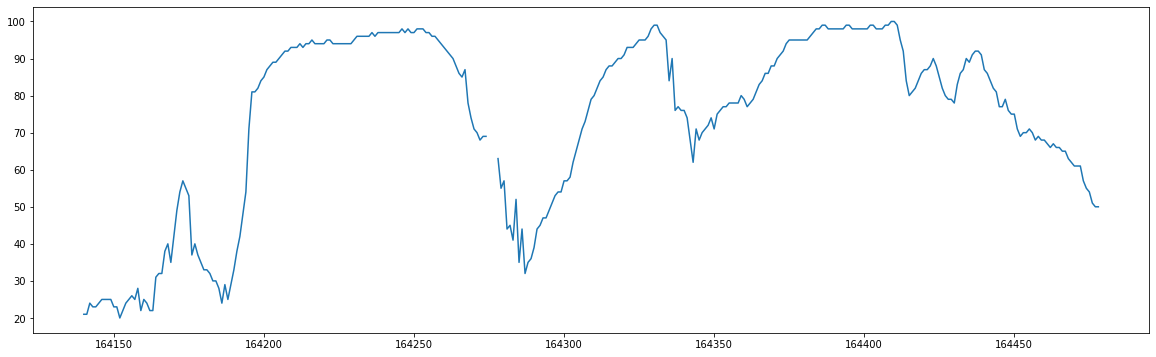

In [20]:
#Visualization
mpl.rcParams['figure.figsize'] = (20, 6)
cleaned_df[cleaned_df['day'] ==  225][450:]['Total Cloud Cover [%]'].plot()

In [21]:
cleaned_df.loc[74473:74483]

,MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),day
74473,12:16,427.237,7.68057,189.71923,20.28,8.318,-3.862,18.59,91.0,1.70,25.59,815.888,0.0,1.146,0.0,0.1742,117
74474,12:17,531.430,77.93350,190.26402,20.28,8.139,-4.261,17.97,92.0,0.00,0.00,815.885,0.0,1.032,0.0,0.1685,117
74475,12:18,508.161,42.49300,190.80757,20.30,8.229,-4.071,18.24,93.0,0.00,0.00,815.885,0.0,1.157,0.0,0.1639,117
74476,12:19,777.916,339.02800,191.34983,20.43,8.721,-2.769,20.20,95.0,1.95,50.64,815.872,0.0,1.216,0.0,0.1726,117
74477,12:20,585.285,118.68500,191.89074,20.66,8.689,-3.111,19.35,94.0,2.70,62.12,815.843,0.0,1.317,0.0,0.1816,117
74478,12:21,509.987,72.03310,192.43023,20.72,8.524,-3.676,18.38,93.0,2.70,81.90,815.840,0.0,1.044,0.0,0.1719,117
74479,12:22,456.900,37.77960,192.96827,20.61,8.965,-2.135,21.07,94.0,2.95,52.58,815.824,0.0,1.182,0.0,0.1696,117
74480,12:23,697.255,285.22000,193.50478,20.62,8.714,-2.886,19.77,94.0,2.95,9.73,815.818,0.0,1.013,0.0,0.1691,117
74481,12:24,452.049,55.17850,194.03971,20.55,8.624,-3.076,19.54,94.0,2.70,23.12,815.824,0.0,1.034,0.0,0.1772,117
74482,12:25,376.189,3.38775,194.57302,20.45,8.457,-3.443,19.06,93.0,2.45,44.98,815.823,0.0,1.016,0.0,0.1731,117


In [22]:
# print(cleaned_df[cleaned_df['Total Cloud Cover [%]'].isna()]['Total Cloud Cover [%]'].to_string())

In [23]:
grouped_cleaned_df.get_group(322).head()

,MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),day
228717,07:12,40.4703,75.4379,118.37622,10.63,2.137,-10.463,19.44,17.0,1.45,263.0,823.693,0.0,-0.003,0.0,0.2960,322
228718,07:13,41.4475,64.9898,118.54149,10.61,2.108,-10.392,19.59,16.0,1.45,264.4,823.689,0.0,-0.003,0.0,0.2817,322
228719,07:14,42.4757,55.6724,118.70707,10.58,2.117,-10.483,19.47,17.0,1.20,255.3,823.685,0.0,0.049,0.0,0.2708,322
228720,07:15,47.1863,98.7241,118.87296,10.60,2.110,-10.590,19.26,15.0,0.95,265.4,823.672,0.0,0.080,0.0,0.2992,322
228721,07:16,65.0338,311.9930,119.03914,10.70,2.179,-10.521,19.25,16.0,1.20,274.7,823.674,0.0,-0.014,0.0,0.3948,322


In [24]:
wv = cleaned_df.pop('Peak Wind Speed @ 6ft [m/s]')
# Convert to radians.
wd_rad = cleaned_df.pop('Avg Wind Direction @ 6ft [deg from N]')*np.pi / 180
   
# Calculate the wind x and y components.
cleaned_df['Wind_x'] = wv*np.cos(wd_rad)
cleaned_df['Wind_y'] = wv*np.sin(wd_rad)

In [25]:
cleaned_df

,MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),day,Wind_x,Wind_y
0,07:47,14.4935,0.079127,123.84491,6.933,1.403,-5.597,38.24,6.0,802.042,0.0,0.032,0.0,0.1951,1,-0.604377,-0.353169
1,07:48,16.5178,-0.034618,124.01096,6.793,1.294,-5.606,38.58,8.0,801.948,0.0,0.029,0.0,0.1867,1,-0.429035,-0.553109
2,07:49,18.6171,-0.153309,124.17734,6.674,1.260,-5.540,39.12,10.0,801.940,0.0,0.173,0.0,0.1783,1,-0.180649,-1.690375
3,07:50,20.5986,-0.143419,124.34405,6.646,1.306,-5.494,39.35,13.0,801.927,0.0,0.144,0.0,0.1758,1,0.287158,-2.181179
4,07:51,22.4362,-0.079128,124.51110,6.676,1.316,-5.384,39.64,15.0,801.829,0.0,0.355,0.0,0.1765,1,-1.311695,-1.766198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252314,16:21,17.0978,-0.222197,236.12566,2.272,-1.659,-7.659,44.33,10.0,812.643,0.0,2.658,0.0,0.2459,366,2.241306,0.989468
252315,16:22,16.5593,-0.202447,236.29155,2.245,-1.743,-7.743,44.09,9.0,812.653,0.0,2.674,0.0,0.2463,366,2.274473,0.910645
252316,16:23,15.6230,-0.197509,236.45711,2.235,-1.773,-7.973,43.24,8.0,812.664,0.0,2.696,0.0,0.2470,366,2.767129,1.022494
252317,16:24,14.5605,-0.202446,236.62235,2.245,-1.683,-7.683,44.32,7.0,812.675,0.0,2.654,0.0,0.2462,366,2.049442,0.799868


In [26]:
cleaned_df['Total Cloud Cover [%]'].fillna(method="ffill", inplace=True)
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
# imputer.fit(train_data.drop(['MST'], axis = 1))
# Xtrans = imputer.transform(train_data.drop(['MST'], axis = 1))

In [27]:
cleaned_df.groupby('day').size().mean()

689.396174863388

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

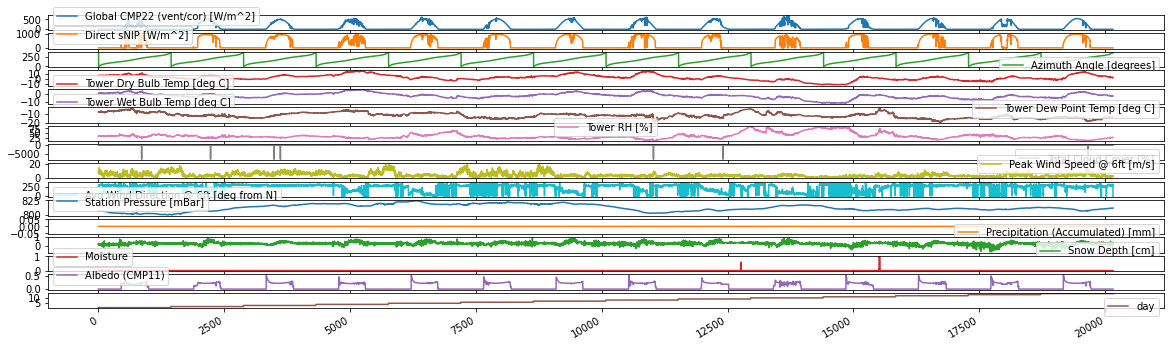

In [28]:
df[:1440*14].plot(subplots=True)

<AxesSubplot:>

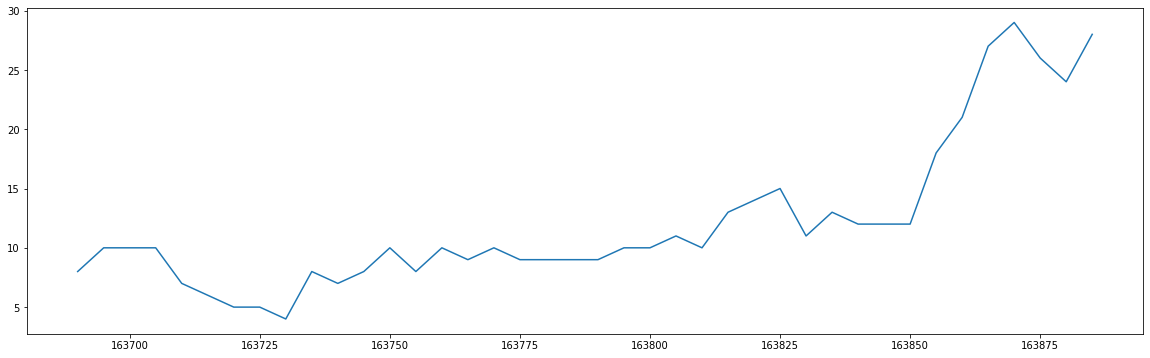

In [29]:
cleaned_df[cleaned_df['day'] ==  225]['Total Cloud Cover [%]'][:200][::5].plot()

In [30]:
cleaned_df.loc[106079-5 : 106079+5]

,MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),day,Wind_x,Wind_y
106074,06:20,266.443,681.210,75.32803,19.39,10.436,3.266,34.30,8.0,816.861,0.0,0.686,0.0,0.2373,156,0.000000,0.000000
106075,06:21,269.830,684.717,75.47192,19.41,10.429,3.329,34.41,8.0,816.861,0.0,0.687,0.0,0.2363,156,0.000000,0.000000
106076,06:22,273.337,688.485,75.61580,19.44,10.513,3.413,34.55,9.0,816.854,0.0,0.680,0.0,0.2353,156,0.000000,0.000000
106077,06:23,276.612,691.507,75.75966,19.50,10.512,3.342,34.25,9.0,816.852,0.0,0.666,0.0,0.2348,156,0.000000,0.000000
106078,06:24,279.757,694.421,75.90351,19.55,10.527,3.427,34.35,9.0,816.838,0.0,0.655,0.0,0.2340,156,0.000000,0.000000
106079,06:25,283.031,697.369,76.04735,19.58,10.607,3.507,34.48,9.0,816.845,0.0,0.711,0.0,0.2335,156,0.392661,-1.133939
106080,06:26,286.363,700.188,76.19118,19.63,10.552,3.452,34.24,9.0,816.845,0.0,0.747,0.0,0.2328,156,0.191857,-1.184564
106081,06:27,289.451,701.853,76.33500,19.67,10.512,3.212,33.58,8.0,816.845,0.0,0.768,0.0,0.2324,156,0.226607,-0.922578
106082,06:28,292.859,705.025,76.47882,19.75,10.654,3.554,34.23,9.0,816.847,0.0,0.725,0.0,0.2323,156,0.269815,-0.910879
106083,06:29,296.115,707.278,76.62265,19.85,10.894,4.094,35.34,9.0,816.844,0.0,0.678,0.0,0.2316,156,-0.052502,-0.446927


In [31]:
# !pip install sklearn

In [32]:
# Split into Train and Validation data
X = list(range(1,367))
from sklearn.utils import shuffle
X = shuffle(X, random_state = 999)
n = 366

train_days = X[0:int(n*0.85)]
val_days = X[int(n*0.85):int(n*0.95)]
test_days = X[int(n*0.95):]

def get_dataframe(dataf,days_list):
  indexes_list = []
  for day in days_list:
    indexes_list = np.append(indexes_list, dataf[dataf['day'] == day].index)
  return dataf.iloc[np.array(indexes_list).astype('int64')]

In [33]:
train_df = get_dataframe(cleaned_df, train_days).drop(['MST'], axis = 1)
val_df = get_dataframe(cleaned_df, val_days).drop(['MST'], axis = 1)
test_df = get_dataframe(cleaned_df, test_days).drop(['MST'], axis = 1)

a = train_df['day']
b = val_df['day']
c = test_df['day']

In [34]:
# Normalize the data
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df- train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std
train_df['day'] = a
val_df['day'] = b
test_df['day'] = c

In [35]:
train_std

Global CMP22 (vent/cor) [W/m^2]     297.906455
Direct sNIP [W/m^2]                 397.259791
Azimuth Angle [degrees]              64.372335
Tower Dry Bulb Temp [deg C]          10.705784
Tower Wet Bulb Temp [deg C]           6.649442
Tower Dew Point Temp [deg C]          7.039930
Tower RH [%]                         22.322874
Total Cloud Cover [%]                35.785054
Station Pressure [mBar]               4.998539
Precipitation (Accumulated) [mm]      1.691374
Snow Depth [cm]                       3.547683
Moisture                              0.219703
Albedo (CMP11)                        0.178639
day                                  96.453559
Wind_x                                1.914352
Wind_y                                3.056864
dtype: float64

In [36]:
train_df

,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),day,Wind_x,Wind_y
81190,-1.251964,-0.427664,-1.694957,-0.665313,-0.901709,-1.348611,-0.658265,-1.267467,0.956526,-0.195194,-0.267109,-0.242004,0.811902,126,0.912731,-1.151978
81191,-1.246193,-0.370405,-1.692533,-0.680258,-0.907875,-1.354435,-0.651545,-1.239523,0.955926,-0.195194,-0.253298,-0.242004,0.799027,126,0.209232,-1.245670
81192,-1.237577,-0.335448,-1.690112,-0.687730,-0.946675,-1.462106,-0.708886,-1.267467,0.957326,-0.195194,-0.201151,-0.242004,0.739689,126,0.149671,-1.253055
81193,-1.229341,-0.305012,-1.687694,-0.667181,-0.944870,-1.545630,-0.767122,-1.295412,0.957326,-0.195194,-0.176910,-0.242004,0.690428,126,-0.190989,-0.945423
81194,-1.220958,-0.276416,-1.685278,-0.645697,-0.912687,-1.472618,-0.741140,-1.267467,0.958126,-0.195194,-0.242305,-0.242004,0.680351,126,-0.192083,-1.436125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7889,-1.323451,-1.232650,0.907295,-1.230521,-1.403104,-1.367645,-0.186552,-1.323357,0.713255,-0.195194,-0.351954,-0.242004,-0.845633,15,1.049642,-1.291292
7890,-1.325675,-1.234691,0.909868,-1.236126,-1.409721,-1.373895,-0.186104,-1.323357,0.727259,-0.195194,-0.352235,-0.242004,-0.853470,15,1.571129,0.428210
7891,-1.327969,-1.236135,0.912437,-1.243972,-1.403856,-1.368355,-0.172664,-1.323357,0.735061,-0.195194,-0.356464,-0.242004,-0.847872,15,1.857272,0.066011
7892,-1.330265,-1.237343,0.915000,-1.250977,-1.414383,-1.378299,-0.174008,-1.323357,0.720857,-0.195194,-0.347162,-0.242004,-0.844513,15,2.518042,0.476324


In [37]:
#@title Default title text
# # Baseline Model
# import os
# tcc_list = np.array([])
# for i in range(1,301):
#   t_df = pd.read_csv(os.path.join('/content/drive/MyDrive/Shell_ai/dataset/test', str(i), "weather_data.csv"))
#   tcc_list 
#   t_df['Total Cloud Cover [%]'].replace(-7999, np.NaN, inplace  = True)
#   t_df['Total Cloud Cover [%]'].replace(-1, np.NaN, inplace  = True)
#   t_df['Total Cloud Cover [%]'].replace(-6999, np.NaN, inplace  = True) 
#   t_df['Total Cloud Cover [%]'].fillna(method="ffill", inplace=True)
#   tcc_list = np.append(tcc_list, t_df['Total Cloud Cover [%]'].iloc[-1])  
# y = pd.DataFrame([[tcc_list.astype('int64')[j] for i in range(4)] for j in range(len(tcc_list))] )
# create_submission(y,'/content/sub.csv')

In [38]:
#@title Default title text
# ARIMA Model
# !pip install statsmodels
# from statsmodels.tsa.arima_model import ARIMA

# # from statsmodels.tsa.arima.model import ARIMA
# model = ARIMA(series, order=(10,1,1))
# model_fit = model.fit()
# output = model_fit.forecast()[0]

	# yhat = output[0]
	# predictions.append(yhat)
	# obs = test[t]
	# history.append(obs)
	# print('predicted=%f, expected=%f' % (yhat, obs))

In [39]:
#@title Default title text
# from sklearn.metrics import mean_absolute_error
# from statsmodels.tsa.arima_model import ARIMA
# import warnings
# # !pip install statsmodels

# # evaluate an ARIMA model for a given order (p,d,q)
# def evaluate_arima_model(X, arima_order):
# 	# prepare training dataset
# 	train_size = int(len(X) * 0.66)
# 	train, test = X[0:train_size], X[train_size:]
# 	history = [x for x in train]
# 	# make predictions
# 	predictions = list()
# 	for t in range(len(test)):
# 		model = ARIMA(history, order=arima_order)
# 		model_fit = model.fit()
# 		yhat = model_fit.forecast()[0]
# 		predictions.append(yhat)
# 		history.append(test[t])
# 	# calculate out of sample error
# 	mae = mean_absolute_error(test, predictions)
# 	return mae
 
# # evaluate combinations of p, d and q values for an ARIMA model
# def evaluate_models(dataset, p_values, d_values, q_values):
# 	dataset = dataset.astype('float32')
# 	best_score, best_cfg = float("inf"), None
# 	for p in p_values:
# 		for d in d_values:
# 			for q in q_values:
# 				order = (p,d,q)
# 				try:
# 					rmse = evaluate_arima_model(dataset, order)
# 					if rmse < best_score:
# 						best_score, best_cfg = rmse, order
# 					print('ARIMA%s RMSE=%.3f' % (order,rmse))
# 				except:
# 					continue
# 	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 
# # load dataset
# series = cleaned_df[cleaned_df['day'] == 1]['Total Cloud Cover [%]'][0::5]
# # evaluate parameters
# p_values = [0, 1, 2, 4, 6, 8, 10]
# d_values = range(0, 3)
# q_values = range(0, 3)
# warnings.filterwarnings("ignore")
# evaluate_models(series.values, p_values, d_values, q_values)

In [40]:
#@title
# #@title
# output = []
# for i in range(300):
#   series = test_data[i]
#   model = ARIMA(series, order=(1,0,0))
#   model_fit = model.fit()
#   output.append(model_fit.forecast(steps = 120)[0][29::30])

In [41]:
#@title
# #@title
# for i in range(300):
#   for j in range(4):
#     output[i][j] = round(output[i][j])

In [42]:
#@title
# create_submission(pd.DataFrame(np.array(output).astype('int64')),'/content/sub.csv')

In [43]:
#@title Default title text
# # @title Default title text
# #Ensembling
# df_nn = pd.read_csv('/content/sub.csv')
# df_loocf = pd.read_csv('/content/sub3.csv')
# x = (df_nn + df_loocf) / 2
# create_submission(x.drop('scenario_set', axis = 1),'/content/sub1.csv' )

### Using Deep Learning Models

In [44]:
# # extract test data
# import os
# test_data = []*300
# for i in range(1,301):
#   t_df = pd.read_csv(os.path.join('/content/drive/MyDrive/Shell_ai/dataset/test', str(i), "weather_data.csv")) 
#   t_df['Total Cloud Cover [%]'].replace(-7999, np.NaN, inplace  = True)
#   t_df['Total Cloud Cover [%]'].replace(-1, np.NaN, inplace  = True)
#   t_df['Total Cloud Cover [%]'].replace(-6999, np.NaN, inplace  = True) 
#   t_df['Total Cloud Cover [%]'].fillna(method="ffill", inplace=True)
#   t_df['Total Cloud Cover [%]'].fillna(method='backfill', inplace=True)
#   t_df.drop('Time [Mins]', axis = 1, inplace = True)
#   wv = t_df.pop('Peak Wind Speed @ 6ft [m/s]')
#   # Convert to radians.
#   wd_rad = t_df.pop('Avg Wind Direction @ 6ft [deg from N]')*np.pi / 180
#   # Calculate the wind x and y components.
#   t_df['Wind_x'] = wv*np.cos(wd_rad)
#   t_df['Wind_y'] = wv*np.sin(wd_rad)
#   t_df = (t_df- train_mean.drop('day')) / train_std.drop('day')
#   test_data.append(t_df)

In [45]:
# plt.rcParams['figure.figsize'] = [18, 18]
# cleaned_df.hist()
# plt.title('Distribution of Features')
# plt.show()

In [46]:
# train_df['tcc_30'] = series.shift(-30)
# train_df['tcc_60'] = series.shift(-60)
# train_df['tcc_90'] = series.shift(-90)
# train_df['tcc_120'] = series.shift(-120)

In [47]:
# # Plotting correlation between every pair of columns
# plt.rcParams['figure.figsize'] = [20, 20]
# sns.heatmap(train_df.drop(['30','x'] , axis = 1).corr(),annot = True,cmap = "YlGnBu")
# plt.title('Correlation Matrix')
# plt.show()

In [48]:
import tensorflow as tf

In [49]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [54]:
#@title Default title text
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,label_shift,
               train_df = train_df, val_df = val_df, test_df = test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift
    self.label_shift = label_shift
    self.total_window_size = input_width + shift + label_shift*(label_width - 1)

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.input_width + self.shift - 1
    self.labels_slice = slice(self.label_start, None, label_shift)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
    
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=64,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

import random
def chain(iterables):
  while True:
    random.shuffle(iterables)
    for it in iterables:
      lst = list(it)
      random.shuffle(lst)
      for element in lst:
          yield element

In [51]:
# def get_test_predictions(model, ws,features_list,srate) :

#   X = np.zeros((300,ws,len(features_list)))
#   for i in range(300):  
#     X[i] = np.array(test_data[i][::srate][-ws:][['Total Cloud Cover [%]']])
#   output = model.predict(X)
#   output = output.reshape(300,4)
#   output = pd.DataFrame(output.reshape(300,4))
#   output = output*train_std.loc['Total Cloud Cover [%]'] + train_mean.loc['Total Cloud Cover [%]']
#   for i in range(300):
#     for j in range(4):
#       if(output.iloc[i][j] > 100):
#           output.iloc[i][j] = 100
#   create_submission(pd.DataFrame(np.array(output)),'/content/sub3.csv')
#   return output

In [52]:
# plt.rcParams['figure.figsize'] = [18, 7]
# test_data[34]['Total Cloud Cover [%]'].plot()

In [53]:
#@title Default title text
# for ws in [5]:
#   print("\n\nfor ws = {}".format(ws))
#   grouped_df1 = train_df.groupby(['day'], sort = False, as_index = False)
#   iter_list_train = [ WindowGenerator(input_width=ws, label_width = 4, shift=30, label_shift = 30,train_df = grouped_df1.get_group(day).drop('day' , axis = 1)[['Total Cloud Cover [%]']], label_columns=['Total Cloud Cover [%]']).train for day in train_df['day'].unique() ]
#   # train_generator = itertools.chain.from_iterable( iter_list )

#   grouped_df1 = val_df.groupby(['day'], sort = False, as_index = False)
#   iter_list_val = [ WindowGenerator(input_width=ws, label_width = 4, shift=30, label_shift = 30,train_df = grouped_df1.get_group(day).drop('day' , axis = 1)[['Total Cloud Cover [%]']], label_columns=['Total Cloud Cover [%]']).train for day in val_df['day'].unique() ]
#   # val_generator = itertools.chain.from_iterable( iter_list )

#   grouped_df1 = test_df.groupby(['day'], sort = False, as_index = False)
#   iter_list_test = [ WindowGenerator(input_width=ws, label_width = 4, shift=30, label_shift = 30,train_df = grouped_df1.get_group(day).drop('day' , axis = 1)[['Total Cloud Cover [%]']], label_columns=['Total Cloud Cover [%]']).train for day in test_df['day'].unique() ]
#   # test_generator = itertools.chain.from_iterable( iter_list )

#   train_batches = 0
#   for x in iter_list_train:
#     train_batches = train_batches + len(x)
#   print(train_batches)
#   val_batches = 0
#   for x in iter_list_val:
#     val_batches = val_batches + len(x)
#   print(val_batches)

#   test_batches = 0
#   for x in iter_list_test:
#     test_batches = test_batches + len(x)
#   print(test_batches)

#   train_gen = chain(iter_list_train)
#   val_gen = chain(iter_list_val)
#   test_gen = chain(iter_list_test)

#   # Linear Model
#   linear = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=(ws, 1)),
#     tf.keras.layers.Dense(units=4)
# ])

#   from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

#   callbacks = [
#       EarlyStopping(monitor='val_loss', patience=3,  mode='min',verbose=1),
#       ReduceLROnPlateau(factor=0.1, patience=5, min_lr=1e-9, verbose=1),
#       ModelCheckpoint('linear_{}.h5'.format(ws), verbose=1, save_best_only=True, save_weights_only=True) ]

#   linear.compile(loss=tf.keras.losses.MeanAbsoluteError(),
#                 optimizer=tf.optimizers.SGD(learning_rate=1e-2, momentum = 0.9),
#                 metrics=[tf.metrics.MeanAbsoluteError()])

#   history = linear.fit(train_gen, steps_per_epoch = train_batches, epochs=20, validation_data = val_gen, validation_steps = val_batches, callbacks=callbacks)
#   linear.evaluate(test_gen, steps = test_batches)

In [55]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each time step is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return tf.stack([inputs[:,-1,-1], inputs[:,-1,-1], inputs[:,-1,-1], inputs[:,-1,-1]], axis=1)+ delta

### MLP

In [55]:
# %%capture
# !pip install wandb

In [56]:
# import wandb
# from wandb.keras import WandbCallback

# wandb.login()

In [57]:
# def Model(units_1,units_2):

#     mlp_model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(units = units_1, activation='relu'),
#     tf.keras.layers.Dense(units = units_2, activation='relu'),
#     tf.keras.layers.Dense(units=4),
#   ])
#     return ResidualWrapper(mlp_model)

In [58]:
# sweep_config = {
#   'method': 'grid', 
#   'metric': {
#       'name': 'val_loss',
#       'goal': 'minimize'
#   },

#   'parameters': {
#       'learning_rate':{
#           'values': [0.01, 0.005, 0.001, 0.0005, 0.0001]
#       },
#       'sr_nd_ws':{
#           'values': [[10,1], [10,3], [10,9],[10,12],  [6,1], [6,5], [6,10], [6,20],[30,4],[30,1],[1,1], [1,3], [1,10] ,[1,60], [1,120],[3,1] , [3,3] , [3,10] ,[3,30], [3,50] ]
#       },
#       'units_1':{
#           'values': [128,256]
#       },
#       'units_2':{
#           'values': [128, 256]
#       },
#       'cols_list':{
#           'values': [
#                      ['Direct sNIP [W/m^2]','Azimuth Angle [degrees]','Tower Dew Point Temp [deg C]',
#        'Tower RH [%]', 'Total Cloud Cover [%]', 'Station Pressure [mBar]', 'Moisture', 'Wind_x'] , ['Total Cloud Cover [%]'] ]
#       },
#   }
# }

In [59]:
#   'early_terminate':{
#       'type': 'hyperband',
#       'min_iter': 2,
#       'eta': 2
#   },

In [60]:
# def sweep_train():
#     # Specify the hyperparameter to be tuned along with
#     # an initial value
#     config_defaults = {
#         'learning_rate': 0.01,
#         'sr nd ws': [10,1],
#       'units_1':128,
#       'units_2': 64,
#       'cols_list': ['Total Cloud Cover [%]'],
#     }

#     # Initialize wandb with a sample project name
#     wandb.init(config=config_defaults)  # this gets over-written in the Sweep
#     cfg = wandb.config
#     # Specify the other hyperparameters to the configuration, if any
#     cfg.epochs = 20
#     cfg.architecture_name = "residual - MLP"

#     grouped_df1 = train_df.groupby(['day'], sort = False, as_index = False)
#     iter_list_train = [ WindowGenerator(input_width=cfg.sr_nd_ws[1], label_width = 4, shift=30//cfg.sr_nd_ws[0], label_shift = 30//cfg.sr_nd_ws[0],train_df = grouped_df1.get_group(day)[::cfg.sr_nd_ws[0]].drop('day' , axis = 1)[cfg.cols_list], label_columns=['Total Cloud Cover [%]']).train for day in train_df['day'].unique() ]

#     grouped_df1 = val_df.groupby(['day'], sort = False, as_index = False)
#     iter_list_val = [ WindowGenerator(input_width=cfg.sr_nd_ws[1], label_width = 4, shift=30//cfg.sr_nd_ws[0], label_shift = 30//cfg.sr_nd_ws[0],train_df = grouped_df1.get_group(day)[::cfg.sr_nd_ws[0]].drop('day' , axis = 1)[cfg.cols_list], label_columns=['Total Cloud Cover [%]']).train for day in val_df['day'].unique() ]

#     grouped_df1 = test_df.groupby(['day'], sort = False, as_index = False)
#     iter_list_test = [ WindowGenerator(input_width=cfg.sr_nd_ws[1], label_width = 4, shift=30//cfg.sr_nd_ws[0], label_shift = 30//cfg.sr_nd_ws[0],train_df = grouped_df1.get_group(day)[::cfg.sr_nd_ws[0]].drop('day' , axis = 1)[cfg.cols_list], label_columns=['Total Cloud Cover [%]']).train for day in test_df['day'].unique() ]

#     train_batches = 0
#     for x in iter_list_train:
#       train_batches = train_batches + len(x)
#     print(train_batches)
#     val_batches = 0
#     for x in iter_list_val:
#       val_batches = val_batches + len(x)
#     print(val_batches)

#     test_batches = 0
#     for x in iter_list_test:
#       test_batches = test_batches + len(x)
#     print(test_batches)

#     train_gen = chain(iter_list_train)
#     val_gen = chain(iter_list_val)
#     test_gen = chain(iter_list_test)

#     # initialize model
#     model = ResidualWrapper(tf.keras.Sequential([
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(units = cfg.units_1, activation='relu'),
#     tf.keras.layers.Dense(units = cfg.units_2, activation='relu'),
#     tf.keras.layers.Dense(units=4),
#   ]))
    
#     model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = cfg.learning_rate),loss=tf.keras.losses.MeanAbsoluteError())

#     callbacks = [
#         EarlyStopping(monitor='val_loss', patience = 30,  mode='min'),
#         ReduceLROnPlateau(factor=0.1, patience = 30, verbose=1),
#         ModelCheckpoint('Resid_MLP_l:{}_sr:{}_ws:{}_u1:{}_u2:{}_cols:{}.h5'.format(cfg.learning_rate, cfg.sr_nd_ws[0],cfg.sr_nd_ws[1], cfg.units_1, cfg.units_2,len(cfg.cols_list)), verbose=1, save_best_only=True, save_weights_only=True) ]

  
#     # train and validate
#     history = model.fit(train_gen, steps_per_epoch = train_batches, epochs=cfg.epochs, validation_data = val_gen, validation_steps = val_batches,callbacks = [WandbCallback(),callbacks])

In [61]:
# model1 = ResidualWrapper(tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape = (20,8)),
#     tf.keras.layers.Dense(units = 64, activation='relu'),
#     tf.keras.layers.Dense(units = 128, activation='relu'),
#     tf.keras.layers.Dense(units=4),
#   ]))
    
# model1.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 0.005),loss=tf.keras.losses.MeanAbsoluteError())

In [62]:
# sweep_id = wandb.sweep(sweep_config, project="shell.ai-hackathon-level-1.5")

In [63]:
# wandb.agent(sweep_id, function=sweep_train, count = 800)

In [ ]:
!nvidia-smi

In [ ]:
grouped_df1 = train_df.groupby(['day'], sort = False, as_index = False)
iter_list_train = [ WindowGenerator(input_width=1, label_width = 4, shift=30//1, label_shift = 30//1,train_df = grouped_df1.get_group(day)[::1].drop('day' , axis = 1)[['Total Cloud Cover [%]']], label_columns=['Total Cloud Cover [%]']).train for day in train_df['day'].unique() ]

grouped_df1 = val_df.groupby(['day'], sort = False, as_index = False)
iter_list_val = [ WindowGenerator(input_width=1, label_width = 4, shift=30//1, label_shift = 30//1,train_df = grouped_df1.get_group(day)[::1].drop('day' , axis = 1)[['Total Cloud Cover [%]']], label_columns=['Total Cloud Cover [%]']).train for day in val_df['day'].unique() ]

grouped_df1 = test_df.groupby(['day'], sort = False, as_index = False)
iter_list_test = [ WindowGenerator(input_width=1, label_width = 4, shift=30//1, label_shift = 30//1,train_df = grouped_df1.get_group(day)[::1].drop('day' , axis = 1)[['Total Cloud Cover [%]']], label_columns=['Total Cloud Cover [%]']).train for day in test_df['day'].unique() ]

train_batches = 0
for x in iter_list_train:
  train_batches = train_batches + len(x)
print(train_batches)
val_batches = 0
for x in iter_list_val:
  val_batches = val_batches + len(x)
print(val_batches)

test_batches = 0
for x in iter_list_test:
  test_batches = test_batches + len(x)
print(test_batches)

train_gen = chain(iter_list_train)
val_gen = chain(iter_list_val)
test_gen = chain(iter_list_test)

# initialize model
model1 = tf.keras.Sequential([
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(units = 128, activation='relu'),
tf.keras.layers.Dense(units = 128, activation='relu'),
tf.keras.layers.Dense(units=4),
])

model1.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 0.01),loss=tf.keras.losses.MeanAbsoluteError())

# callbacks = [
#     EarlyStopping(monitor='val_loss', patience = 5,  mode='min'),
#     ReduceLROnPlateau(factor=0.1, patience = 3, verbose=1) ]


# train and validate
history = model1.fit(train_gen, steps_per_epoch = train_batches, epochs=30, validation_data = val_gen, validation_steps = val_batches)

2948
325
178
Epoch 1/30
2948/2948 [==============================] - 24s 8ms/step - loss: 0.4021 - val_loss: 0.3746
Epoch 2/30
2938/2948 [============================>.] - ETA: 0s - loss: 0.3689

In [ ]:
cols = ['Direct sNIP [W/m^2]','Azimuth Angle [degrees]','Tower Dew Point Temp [deg C]',
       'Tower RH [%]', 'Total Cloud Cover [%]', 'Station Pressure [mBar]', 'Moisture', 'Wind_x']
,
    ModelCheckpoint('xx_MLP_l:{}_sr:{}_ws:{}_u1:{}_u2:{}_cols:{}.h5'.format(cfg.learning_rate, cfg.sr_nd_ws[0],cfg.sr_nd_ws[1], cfg.units_1, cfg.units_2,len(cfg.cols_list)), verbose=1, save_best_only=True, save_weights_only=True)

In [ ]:
grouped_df1 = test_df.groupby(['day'], sort = False, as_index = False)

iter_list_test = [ WindowGenerator(input_width=20, label_width = 4, shift=30//6, label_shift = 30//6,train_df = grouped_df1.get_group(day)[::6].drop('day' , axis = 1)[['Direct sNIP [W/m^2]','Azimuth Angle [degrees]','Tower Dew Point Temp [deg C]',
       'Tower RH [%]', 'Total Cloud Cover [%]', 'Station Pressure [mBar]', 'Moisture', 'Wind_x']], label_columns=['Total Cloud Cover [%]']).train for day in test_df['day'].unique() ]
test_gen = chain(iter_list_test)

In [ ]:
test_batches = 0
for x in iter_list_test:
    test_batches = test_batches + len(x)
print(test_batches)

In [ ]:
model1.built = True
model1.load_weights('Resid_MLP_l:0.005_sr:6_ws:20_u1:64_u2:128_cols:8.h5')
model1.evaluate(test_gen, steps = test_batches )

### Residual MLP

In [ ]:
for ws in [30]:
  sr = 30
  print("\n\nfor ws = {}".format(ws))
  grouped_df1 = train_df.groupby(['day'], sort = False, as_index = False)
  iter_list_train = [ WindowGenerator(input_width=ws, label_width = 4, shift=30//sr, label_shift = 30//sr,train_df = grouped_df1.get_group(day)[::sr].drop('day' , axis = 1)[['Total Cloud Cover [%]']], label_columns=['Total Cloud Cover [%]']).train for day in train_df['day'].unique() ]
  # train_generator = itertools.chain.from_iterable( iter_list )

  grouped_df1 = val_df.groupby(['day'], sort = False, as_index = False)
  iter_list_val = [ WindowGenerator(input_width=ws, label_width = 4, shift=30//sr, label_shift = 30//sr,train_df = grouped_df1.get_group(day)[::sr].drop('day' , axis = 1)[['Total Cloud Cover [%]']], label_columns=['Total Cloud Cover [%]']).train for day in val_df['day'].unique() ]
  # val_generator = itertools.chain.from_iterable( iter_list )

  grouped_df1 = test_df.groupby(['day'], sort = False, as_index = False)
  iter_list_test = [ WindowGenerator(input_width=ws, label_width = 4, shift=30//sr, label_shift = 30//sr,train_df = grouped_df1.get_group(day)[::sr].drop('day' , axis = 1)[['Total Cloud Cover [%]']], label_columns=['Total Cloud Cover [%]']).train for day in test_df['day'].unique() ]
  # test_generator = itertools.chain.from_iterable( iter_list )

  train_batches = 0
  for x in iter_list_train:
    train_batches = train_batches + len(x)
  print(train_batches)
  val_batches = 0
  for x in iter_list_val:
    val_batches = val_batches + len(x)
  print(val_batches)

  test_batches = 0
  for x in iter_list_test:
    test_batches = test_batches + len(x)
  print(test_batches)

  train_gen = chain(iter_list_train)
  val_gen = chain(iter_list_val)
  test_gen = chain(iter_list_test)

  # Linear Model
  linear =   tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=4),
])

  from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

  callbacks = [
      EarlyStopping(monitor='val_loss', patience = 4,  mode='min',verbose=1),
      ReduceLROnPlateau(factor=0.1, patience = 3, verbose=1),
      ModelCheckpoint('conv_{}.h5'.format(ws), verbose=1, save_best_only=True, save_weights_only=True) ]

  linear.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                optimizer=tf.optimizers.Adam())

  history = linear.fit(train_gen, steps_per_epoch = train_batches, epochs=40, validation_data = val_gen, validation_steps = val_batches, callbacks=callbacks)
  linear.evaluate(test_gen, steps = test_batches)

### CNN

### Residual CNN

In [ ]:
for ws in [5]:
  sr = 3
  print("\n\nfor ws = {}".format(ws))
  grouped_df1 = train_df.groupby(['day'], sort = False, as_index = False)
  iter_list_train = [ WindowGenerator(input_width=ws, label_width = 4, shift=30//sr, label_shift = 30//sr,train_df = grouped_df1.get_group(day)[::sr].drop('day' , axis = 1)[['Total Cloud Cover [%]']], label_columns=['Total Cloud Cover [%]']).train for day in train_df['day'].unique() ]
  # train_generator = itertools.chain.from_iterable( iter_list )

  grouped_df1 = val_df.groupby(['day'], sort = False, as_index = False)
  iter_list_val = [ WindowGenerator(input_width=ws, label_width = 4, shift=30//sr, label_shift = 30//sr,train_df = grouped_df1.get_group(day)[::sr].drop('day' , axis = 1)[['Total Cloud Cover [%]']], label_columns=['Total Cloud Cover [%]']).train for day in val_df['day'].unique() ]
  # val_generator = itertools.chain.from_iterable( iter_list )

  grouped_df1 = test_df.groupby(['day'], sort = False, as_index = False)
  iter_list_test = [ WindowGenerator(input_width=ws, label_width = 4, shift=30//sr, label_shift = 30//sr,train_df = grouped_df1.get_group(day)[::sr].drop('day' , axis = 1)[['Total Cloud Cover [%]']], label_columns=['Total Cloud Cover [%]']).train for day in test_df['day'].unique() ]
  # test_generator = itertools.chain.from_iterable( iter_list )

  train_batches = 0
  for x in iter_list_train:
    train_batches = train_batches + len(x)
  print(train_batches)
  val_batches = 0
  for x in iter_list_val:
    val_batches = val_batches + len(x)
  print(val_batches)

  test_batches = 0
  for x in iter_list_test:
    test_batches = test_batches + len(x)
  print(test_batches)

  train_gen = chain(iter_list_train)
  val_gen = chain(iter_list_val)
  test_gen = chain(iter_list_test)

  # Linear Model
  linear =   ResidualWrapper(tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(2,),
                           activation='relu'),
    
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.MaxPooling1D(pool_size = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=4),
]))

  from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

  callbacks = [
      EarlyStopping(monitor='val_loss', patience=3,  mode='min',verbose=1),
      ReduceLROnPlateau(factor=0.1, patience=2, verbose=1),
      ModelCheckpoint('conv_{}.h5'.format(ws), verbose=1, save_best_only=True, save_weights_only=True) ]

  linear.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                optimizer=tf.optimizers.Adam())

  history = linear.fit(train_gen, steps_per_epoch = train_batches, epochs=40, validation_data = val_gen, validation_steps = val_batches, callbacks=callbacks)
  linear.evaluate(test_gen, steps = test_batches)

In [ ]:
linear.load_weights('/content/conv_{}.h5'.format(ws))
get_test_predictions(linear,ws,['Total Cloud Cover [%]'], sr)

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_csv('sub3 ({}).csv'.format(3))
df2 = pd.read_csv('ens11.csv')
df = df1 + df2
d = df/2

In [ ]:
dfs = []
for i in range(2,11):
  df = pd.read_csv('sub3 ({}).csv'.format(i))
  dfs.append(df)

In [ ]:
df = dfs[0]
for i in range(1,9):
  df = df + dfs[i]
d = df/9

In [ ]:
def create_submission(x,path):
  x.index = list(range(1,301))
  x.to_csv(path,header=['30_min_horizon', '60_min_horizon', '90_min_horizon', '120_min_horizon'], index=True, index_label = 'scenario_set')

In [ ]:
create_submission(d.drop('scenario_set',axis = 1),'/content/ens1.csv')